<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [6]:
import pandas as pd
data = pd.read_csv("C:/Users/81801/data_store/R_Appendix/sec3_reg.csv")
data.head()

,Date,LogPI_A,LogPriceIndex_A,LogPriceIndex_B,Display_A,Display_B
0,20000102,0.022246,0.0,-0.127213,0,0
1,20000103,0.181522,0.0,-0.127213,0,0
2,20000104,-1.344691,0.0,-0.127213,0,0
3,20000105,-0.481191,0.0,-0.127213,0,0
4,20000106,0.203341,0.0,-0.127213,0,0


2つのブランドの醤油(醤油Aと醤油Bとする)を販売するケースを考えます。

両方の商品について「価格を変更する」「山積み陳列する」というそれぞれ2つの施策が組み合わせて行われている。
上の施策を実施した結果、醤油AのPI値の対数がどのように変化するのかをモデル化する。

つまり醤油AのPI値の対数が目的変数となります。

LogPI_Aが醤油AのPI値の対数
PI値とは、その商品の販売点数÷客数で計算される値で、その商品の人気度・支持度を表す指標
値が大きい => 人気(一人の人がより多く買っている)

LogPriceIndex_AとLogPriceIndex_Bはそれぞれ、 log商品Aの売価商品Aの期間最大売価 、 log商品Bの売価商品Bの期間最大売価 で計算される値で、ここでは価格掛率と呼ぶ
値が小さいほど安売りされている

In [16]:
for col_name in data.columns:
    print(data[col_name].value_counts())

20011007    1
20030417    1
20030402    1
20030403    1
20021003    1
20030405    1
20030406    1
20030407    1
20030408    1
20030409    1
20030410    1
20030411    1
20030412    1
20030413    1
20030414    1
20030415    1
20030416    1
20020808    1
20030418    1
20021006    1
20030722    1
20020920    1
20020131    1
20020114    1
20020115    1
20020116    1
20020117    1
20020118    1
20020119    1
20020120    1
           ..
20020730    1
20020731    1
20030823    1
20030706    1
20010501    1
20010502    1
20010503    1
20010504    1
20010505    1
20020721    1
20020720    1
20020719    1
20000229    1
20000222    1
20000223    1
20000224    1
20000225    1
20000226    1
20000227    1
20000228    1
20020710    1
20020718    1
20020711    1
20020712    1
20020713    1
20020714    1
20020715    1
20020716    1
20020717    1
20011008    1
Name: Date, Length: 1314, dtype: int64
 0.134675    2
-1.475678    2
-1.165959    2
-1.233726    2
-1.268074    2
-1.046968    2
 0.492658    2
-0

In [17]:
data.describe()

,Date,LogPI_A,LogPriceIndex_A,LogPriceIndex_B,Display_A,Display_B
count,1.314000e+03,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000
mean,2.001454e+07,0.461188,-0.109652,-0.168167,0.083714,0.210046
std,1.063250e+04,1.063511,0.119585,0.176934,0.277064,0.407496
min,2.000010e+07,-1.629241,-1.063218,-1.144398,0.000000,0.000000
25%,2.000122e+07,-0.207621,-0.176704,-0.222007,0.000000,0.000000
50%,2.001111e+07,0.479017,-0.135545,-0.127213,0.000000,0.000000
75%,2.002101e+07,1.192025,0.000000,0.000000,0.000000,0.000000
max,2.003090e+07,5.005715,0.000000,0.000000,1.000000,1.000000


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

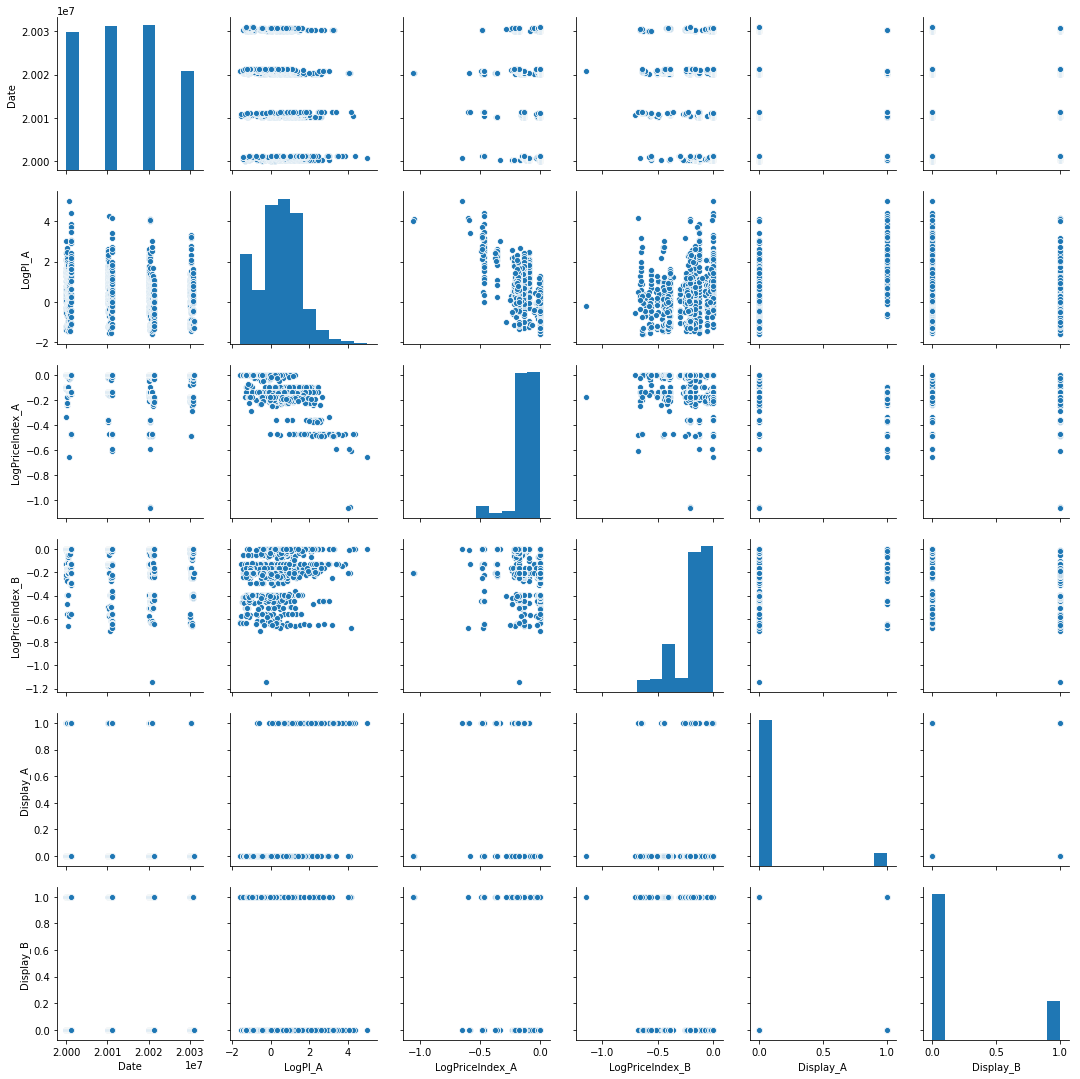

In [21]:
sns.pairplot(data)

{'whiskers': [<matplotlib.lines.Line2D at 0x21c00222b38>,
 'caps': [<matplotlib.lines.Line2D at 0x21c00222550>,
 'boxes': [<matplotlib.lines.Line2D at 0x21c0024a240>,
 'medians': [<matplotlib.lines.Line2D at 0x21c00222630>,
 'fliers': [<matplotlib.lines.Line2D at 0x21c00450c88>,
 'means': []}

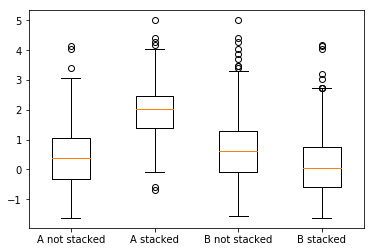

In [32]:
display_a_is_0 =  data[data["Display_A"]==0]["LogPI_A"]
display_a_is_1 = data[data["Display_A"]==1]["LogPI_A"]
display_b_is_0 = data[data["Display_B"]==0]["LogPI_A"]
display_b_is_1 = data[data["Display_B"]==1]["LogPI_A"]
display_labels = ["A not stacked","A stacked","B not stacked","B stacked"]
plt.boxplot([display_a_is_0,display_a_is_1,display_b_is_0,display_b_is_1],labels = display_labels)

In [33]:
import numpy as np

In [39]:
np.var(data[data["Display_B"]==1])
np.var(data[data["Display_B"]==0])

Date               1.189233e+08
LogPI_A            1.090087e+00
LogPriceIndex_A    1.257207e-02
LogPriceIndex_B    1.661813e-02
Display_A          7.918741e-02
Display_B          0.000000e+00
dtype: float64

In [41]:
import statsmodels.api as sm
model = sm.OLS(data["LogPI_A"],
              sm.add_constant(
                  data[["LogPriceIndex_A","LogPriceIndex_B","Display_A","Display_B"]]
              ))

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [48]:
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                LogPI_A   R-squared:                       0.583
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     457.7
Date:                Mon, 02 Dec 2019   Prob (F-statistic):          7.99e-247
Time:                        10:41:35   Log-Likelihood:                -1370.1
No. Observations:                1314   AIC:                             2750.
Df Residuals:                    1309   BIC:                             2776.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1628      0.033      4.929      0.000       0.098       0.228
LogPriceIndex_A    -5.0202      0.175    -28.746      0.000      -5.363      -4.678
LogPriceIndex_B     1.9314      0.142     13.577      0.000       1.652       2.210
Display_A           0.7744      0.074     10.460      0.000       0.629       0.920
Display_B           0.0374      0.062      0.607      0.544      -0.084       0.158
==============================================================================
Omnibus:                       41.503   Durbin-Watson:                   1.330
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.669
Skew:                          -0.405   Prob(JB):                     8.95e-10
Kurtosis:                       2.676   Cond. No.                         10.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

LogPriceIndexA,LogPriceIndexB(つまり安売り)の影響(tの値)が圧倒的に大きい.
Aが小さいほど,Bが大きいほど, 商品Aが買われている.(A,Bの売上は競合する)

Display_A の t = 10.460,よりAはstackedのほうがより売れると考えられる.